# Lista 5
Maria Nowacka

In [1]:
# interpolacja z wykładu
def lagrange(x,xData,yData):
    n = len(xData)
    y = 0
    for i in range(n):
        w = 1.0
        for j in range(n):
            if i != j:
                w = w*(x-xData[j])/(xData[i]-xData[j])
        y = y + w*yData[i]
    return y


In [14]:
import matplotlib.pyplot as plt, numpy as np

## zadanie 1
Gęstość powietrza $ρ$ zmienia się z wysokością $h$ w następujący sposób:

$$
\def\arraystretch{1.5}
   \begin{array}{l|l|l|l}
   \hline \hline
   h (\text{km})& 0 & 3 & 6 \\ \hline
\rho (\text{kg/m}^3) &  1,225 & 0,905 & 0,652 \\ \hline \hline
\end{array}
$$
Wyraź $ρ(h)$ jako funkcję kwadratową w $h$.

array([ 1.225     , -0.11783333,  0.00372222])

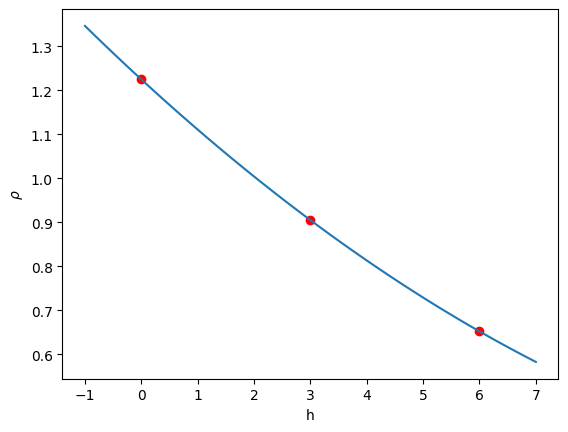

In [18]:
points = [[0, 1.225], [3, 0.905], [6, 0.652]]
def poly(x, coeffs):
    result = 0
    ln = len(coeffs)
    for i, coeff in enumerate(coeffs):
        pow = ln - 1 - i
        result += coeff * x**pow
    return result
def density(points):
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    plt.scatter(x,y, color = 'red')
    plt.xlabel('h')
    plt.ylabel(r'$\rho$')
    n = len(x)-1
    W = np.copy(y)
    # obliczanie ilorazów różnicowych
    for i in range(1,n+1):
        for j in range(n,i-1,-1):
            W[j]=(W[j]-W[j-1])/(x[j]-x[j-i])
    a = np.copy(W)
    # zmiana ilorazów różnicowych na współczynniki wielomianu
    for i in range(n):
        for j in range(n-1,i-1,-1):
            a[j]=a[j]-x[j-i]*a[j+1]
    xs = np.linspace(min(x)-1, max(x)+1, 100)
    # obliczanie wartości wielomianu na wybranym przedziale
    ys = [poly(s, a[::-1]) for s in xs]
    plt.plot(xs, ys, label = 'dopasowanie')
    return a
density(points)

In [22]:
def wielomian(x):
    return 1.225 - 0.11783333*x + 0.00372222*x**2

Uzyskujemy wielomian postaci:
$$ p(x) = 1,225 - 0.11783333x + 0.00372222x^2 $$

## zadanie 2
W poniższej tabeli przedstawiony jest współczynnik oporu $c_D$ sfery w
cieczy jako funkcja liczby Reynoldsa $Re$. Korzystając z naturalnych funkcji sklejanych, znajdź $c_D$ dla $Re$ = 5, 50, i 5000.
$$
\def\arraystretch{1.5}
   \begin{array}{l|l|l|l|l|l|l}
   \hline \hline
   Re & 0,2 & 2 & 20 & 200 & 2000 & 20000\\ \hline
   c_D &  103 & 13,9 & 2,72 & 0,8 & 0,401 & 0,433 \\ \hline \hline
\end{array}
$$